## Team Data_Deciphers

### Time Series Forecasting (with smaller dataset)

In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

import statsmodels.graphics.tsaplots as tsa
import statsmodels.tsa.stattools as ts

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data
data_sales=pd.read_csv('TrainingData - Training.csv', index_col=0) 

In [3]:
# doing some sanity check of data
data_sales.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
Period,,,,,,,,,,,,,,,,,,,,,
2016 - Period:1,504.784933,NaN,NaN,37148.2,2045.282,NaN,NaN,NaN,NaN,7.446883,...,NaN,NaN,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
2016 - Period:2,490.226477,NaN,NaN,50886.8,2370.584,0.000014,0.000015,NaN,NaN,11.677082,...,NaN,NaN,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2016 - Period:3,479.244686,NaN,NaN,253333.2,3180.888,0.000016,0.000017,NaN,NaN,0.102858,...,NaN,NaN,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
2016 - Period:4,489.057428,NaN,NaN,3426239.0,13595.398,0.000016,0.000019,NaN,NaN,0.249055,...,NaN,NaN,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
2016 - Period:5,477.031994,NaN,NaN,552197.8,3983.134,0.000016,0.000019,NaN,NaN,13.338804,...,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


[]

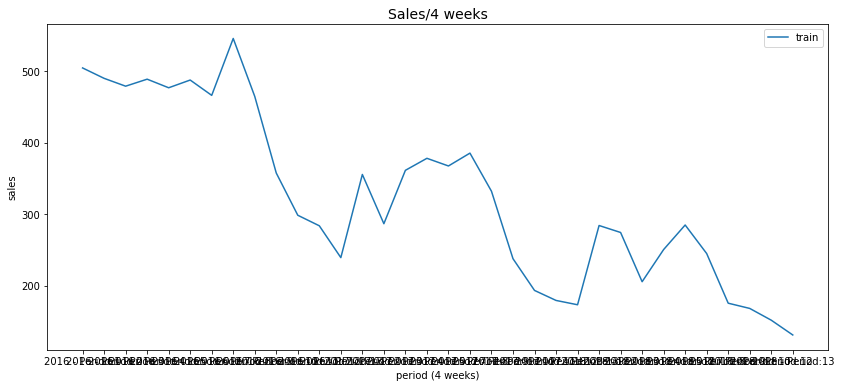

In [4]:
# lets plot the time series data and check for stationarity of the series

plt.figure(figsize=(14,6))
plt.plot(data_sales['EQ'], label='train')
plt.xlabel('period (4 weeks)')
plt.ylabel('sales')
plt.title('Sales/4 weeks', fontsize=14)
plt.legend(loc='best')
plt.plot()

There is trend in data and it looks like a pure white noice. 

Let's plot ACF and PACF grapgs to check auto correation lagged values

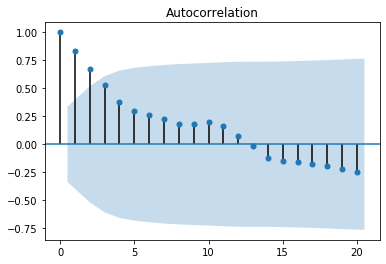

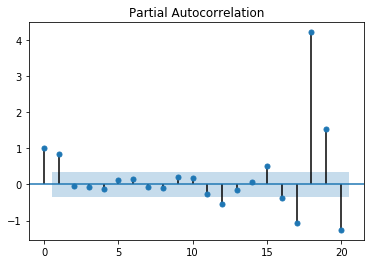

In [5]:
#ACF and PACF
tsa.plot_acf(data_sales['EQ'],lags=20)
tsa.plot_pacf(data_sales['EQ'],lags=20)
plt.show()

In [6]:
# define p d and q parameters to take any values betweem 0 and 2
p=d=q= range(0,2)

# generate all the different combinations of P, D, and Q

pdq=list(itertools.product(p,d,q))

# generate all the different combinations of seasonality p,d and q triplets

seasonal_pdq=[(x[0],x[1],x[2], 13) for x in list(itertools.product(p,d,q))]

print("Example of param components for seasonal ARIMA")
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[3],seasonal_pdq[3]))

Example of param components for seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 13)
SARIMAX: (0, 1, 0) x (0, 1, 0, 13)
SARIMAX: (0, 1, 1) x (0, 1, 1, 13)


In [7]:
train=np.log(data_sales['EQ'])

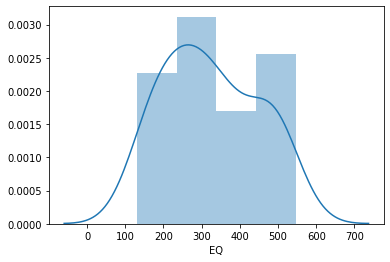

In [8]:
sns.distplot(data_sales['EQ'])
plt.show()

In [9]:
for param_seasonal in seasonal_pdq:
    print(param_seasonal)

(0, 0, 0, 13)
(0, 0, 1, 13)
(0, 1, 0, 13)
(0, 1, 1, 13)
(1, 0, 0, 13)
(1, 0, 1, 13)
(1, 1, 0, 13)
(1, 1, 1, 13)


In [10]:
# iteration of all the combinations of p, d and q

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(train,
                                         order=param,
                                         seasonal_order=param_seasonal,
                                         enforce_stationarity= False,
                                         enforce_invertibility=False)
            results= mod.fit()
            
            print("ARIMA{} x {}12 - AIC:{} - BIC:{}".format(param,param_seasonal,round(results.aic,4),round(results.bic,4)))
        except :
            continue

ARIMA(0, 0, 0) x (0, 0, 0, 13)12 - AIC:210.5597 - BIC:212.0563
ARIMA(0, 0, 0) x (0, 0, 1, 13)12 - AIC:121.5278 - BIC:123.5193
ARIMA(0, 0, 0) x (0, 1, 0, 13)12 - AIC:33.6405 - BIC:34.6362
ARIMA(0, 0, 0) x (0, 1, 1, 13)12 - AIC:12.6468 - BIC:12.5386
ARIMA(0, 0, 0) x (1, 0, 0, 13)12 - AIC:9.4024 - BIC:11.4914
ARIMA(0, 0, 0) x (1, 0, 1, 13)12 - AIC:11.4128 - BIC:14.4
ARIMA(0, 0, 0) x (1, 1, 0, 13)12 - AIC:10.552 - BIC:10.7108
ARIMA(0, 0, 0) x (1, 1, 1, 13)12 - AIC:12.4493 - BIC:12.287
ARIMA(0, 0, 1) x (0, 0, 0, 13)12 - AIC:166.2322 - BIC:169.1637
ARIMA(0, 0, 1) x (0, 0, 1, 13)12 - AIC:95.6553 - BIC:98.4887
ARIMA(0, 0, 1) x (0, 1, 0, 13)12 - AIC:19.1112 - BIC:21.0001
ARIMA(0, 0, 1) x (0, 1, 1, 13)12 - AIC:9.5578 - BIC:8.9331
ARIMA(0, 0, 1) x (1, 0, 0, 13)12 - AIC:11.5881 - BIC:14.7217
ARIMA(0, 0, 1) x (1, 0, 1, 13)12 - AIC:7.0224 - BIC:10.8001
ARIMA(0, 0, 1) x (1, 1, 0, 13)12 - AIC:10.4843 - BIC:10.7227
ARIMA(0, 0, 1) x (1, 1, 1, 13)12 - AIC:10.864 - BIC:10.031
ARIMA(0, 1, 0) x (0, 0, 0, 13

In [11]:
arima_model_train = sm.tsa.statespace.SARIMAX(train,
                                             order=(2,1,2),
                                             seasonal_order= (1, 0, 0, 13),
                                              enforce_stationarity= False,
                                         enforce_invertibility=False)
results_arima_train= arima_model_train.fit()

print(results_arima_train.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0656      1.949     -0.034      0.973      -3.885       3.754
ar.L2         -0.0693      1.260     -0.055      0.956      -2.539       2.401
ma.L1         -1.4957     26.831     -0.056      0.956     -54.084      51.092
ma.L2         -2.5019     78.585     -0.032      0.975    -156.526     151.522
ar.S.L13     7.71e-05      0.394      0.000      1.000      -0.772       0.772
sigma2         0.0045      0.156      0.029      0.977      -0.301       0.310


In [12]:
# predict value based on arima model
pred_arima_train = results_arima_train.get_prediction(dynamic=False)
pred_arima_train_ci = pred_arima_train.conf_int()

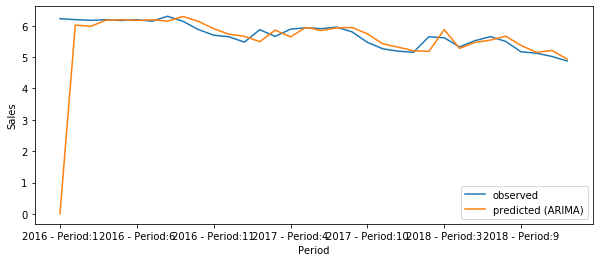

In [13]:
plt.figure(figsize=(10,4))
plot1=train.plot(label='observed')
pred_arima_train.predicted_mean.plot(ax=plot1,label='predicted (ARIMA)')

plt.xlabel('Period')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

Lets check the stationarity of the residual series

### Stationarity tests

In [14]:
residual = pred_arima_train.predicted_mean- train

In [15]:
residual1= residual [~residual.isnull()]

adf_test= ts.adfuller(residual1,autolag='AIC')

print('ADF Statistic: %f' % adf_test[0])
print('P-value : %f'% adf_test[1])
print('Critical Values : ')

for key, values in adf_test[4].items():
    print('\t%s: %.3f' % (key, values))

ADF Statistic: -3.821650
P-value : 0.002693
Critical Values : 
	1%: -3.738
	5%: -2.992
	10%: -2.636


Test statistc is less than Critical values so we can conclude that residual series is stationary or pure white noice.
p-value obtained by the ADF test is less than 0.05 so the residual series is pure white noice.

In [16]:
kpss_test= ts.kpss(residual1,regression='c', store=False)

print('KPSS Statistic: %f' % kpss_test[0])
print('P-value : %f'% kpss_test[1])
print('Critical Values : ')

for key, values in kpss_test[3].items():
    print('\t%s: %.3f' % (key, values))

KPSS Statistic: 0.348055
P-value : 0.099545
Critical Values : 
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


Test statistc is less than Critical values so we can conclude that residual series is stationary or pure white noice.
p-value obtained by the ADF test is less than 0.05 so the residual series is pure white noice.

In [17]:
arima_pred_train= np.exp(pred_arima_train.predicted_mean)
n= len(arima_pred_train)
total=0
for i in range(n):
    total=total+np.absolute((100*(np.exp(train.iloc[i]) - arima_pred_train.iloc[i])/np.exp(train.iloc[i])))
    
MAPE=total/n
print("MAPE Value :  {}".format(round(MAPE,4)))

MAPE Value :  17.1343


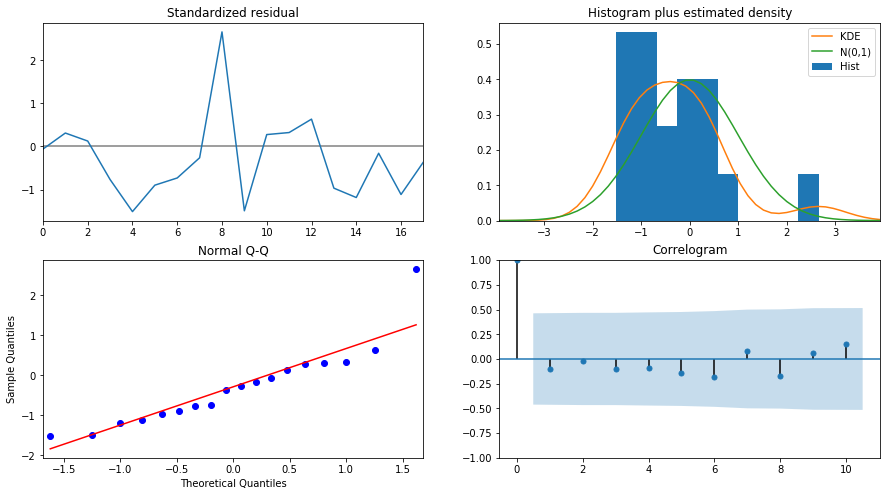

In [18]:
results_arima_train.plot_diagnostics(figsize=(15,8))
plt.show()

In [19]:
pred_arima = results_arima_train.forecast(steps=5)
test=pd.read_csv('TestData - Test.csv', index_col=0) 

In [20]:
test_a=test['EQ']
test_a1=test_a.reset_index().drop('Period',1)
pred_arima1=np.exp(pred_arima.reset_index().drop('index',1))

<Figure size 1008x432 with 0 Axes>

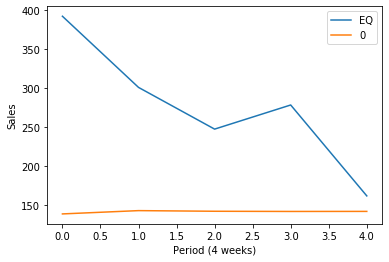

In [21]:
plt.figure(figsize=(14,6))
plot1=test_a1.plot(label='observed')
pred_arima1.plot(ax=plot1,label='predicted (ARIMA)')

plt.xlabel('Period (4 weeks)')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [22]:
arima_pred_test= pred_arima1[0]
n= len(arima_pred_test)
total=0
for i in range(n):
    total=total+np.absolute((100*(test_a1.iloc[i] - arima_pred_test.iloc[i])/test_a1.iloc[i]))
    
MAPE=total/n
print("MAPE Value :  {}".format(round(MAPE,4)))

MAPE Value :  EQ    44.2956
dtype: float64


In [23]:
print(test_a1.iloc[4] - arima_pred_test.iloc[4])

EQ    19.910187
Name: 4, dtype: float64
